In [1]:
import os
import time

import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import re

from copo import pretty_print

%matplotlib inline

In [2]:
EVALUATE_RESULTS_PATH = "./train1m_evaluate_results/"

os.listdir(EVALUATE_RESULTS_PATH)

['Algo-1012_ccppo_mf_Env-Bottle_Seed-10000_Ckpt-220.csv',
 'Algo-1012_ccppo_mf_Env-PGMap_Seed-6000_Ckpt-625.csv',
 'Algo-1003_ccppo_Env-Parking_Seed-8000_Ckpt-580.csv',
 'Algo-1012_ccppo_mf_Env-Bottle_Seed-6000_Ckpt-340.csv',
 'Algo-1003_copo_Env-Round_Seed-10000_Ckpt-450.csv',
 'Algo-1003_copo_Env-Bottle_Seed-6000_Ckpt-625.csv',
 'Algo-1003_ccppo_Env-Parking_Seed-6000_Ckpt-530.csv',
 'Algo-1011_ccppo_concat_Env-PGMap_Seed-11000_Ckpt-625.csv',
 'Algo-1012_ccppo_mf_Env-Inter_Seed-9000_Ckpt-625.csv',
 'Algo-1003_copo_Env-Parking_Seed-6000_Ckpt-625.csv',
 'Algo-1003_ippo_Env-Round_Seed-12000_Ckpt-450.csv',
 'Algo-1003_cl_Env-Tollgate_Seed-12000_Ckpt-920.csv',
 'Algo-1011_ccppo_concat_Env-Bottle_Seed-12000_Ckpt-440.csv',
 'Algo-1003_ippo_Env-PGMap_Seed-7000_Ckpt-625.csv',
 'Algo-1003_ccppo_Env-Round_Seed-11000_Ckpt-290.csv',
 'Algo-1003_cl_Env-PGMap_Seed-12000_Ckpt-1250.csv',
 'Algo-1003_copo_Env-Tollgate_Seed-7000_Ckpt-620.csv',
 'Algo-1003_ippo_Env-Inter_Seed-8000_Ckpt-625.csv',
 'Algo-1

In [3]:
eval_df = []

algo_set = set()
env_set = set()

count = 0

for p in os.listdir(EVALUATE_RESULTS_PATH):
    match = re.search("Algo-(.*?)_Env", p)
    
    if match:
        
        count += 1
        
        algo = match[1]
        env = re.search("Env-(.*?)_", p)[1]
        seed = re.search("Seed-(.*?)_", p)[1]
        ckpt = re.search("Ckpt-(.*?).csv", p)[1]
        
        full_p = os.path.abspath(os.path.join(EVALUATE_RESULTS_PATH, p))
        
        try:
            tmp = pd.read_csv(full_p)
        except Exception as e:
            print(full_p)
            raise e
        tmp["env"] = env
        tmp["seed"] = seed
        tmp["ckpt"] = ckpt
        tmp["model_index"] = p
        
        eval_df.append(tmp)
        
        print(f"[{count}] Processed the agent: Algo={algo}, Env={env}, Seed={seed}, Ckpt={ckpt}")
    else:
        print(p, " not exists!")
                
eval_df = pd.concat(eval_df)

[1] Processed the agent: Algo=1012_ccppo_mf, Env=Bottle, Seed=10000, Ckpt=220
[2] Processed the agent: Algo=1012_ccppo_mf, Env=PGMap, Seed=6000, Ckpt=625
[3] Processed the agent: Algo=1003_ccppo, Env=Parking, Seed=8000, Ckpt=580
[4] Processed the agent: Algo=1012_ccppo_mf, Env=Bottle, Seed=6000, Ckpt=340
[5] Processed the agent: Algo=1003_copo, Env=Round, Seed=10000, Ckpt=450
[6] Processed the agent: Algo=1003_copo, Env=Bottle, Seed=6000, Ckpt=625
[7] Processed the agent: Algo=1003_ccppo, Env=Parking, Seed=6000, Ckpt=530
[8] Processed the agent: Algo=1011_ccppo_concat, Env=PGMap, Seed=11000, Ckpt=625
[9] Processed the agent: Algo=1012_ccppo_mf, Env=Inter, Seed=9000, Ckpt=625
[10] Processed the agent: Algo=1003_copo, Env=Parking, Seed=6000, Ckpt=625
[11] Processed the agent: Algo=1003_ippo, Env=Round, Seed=12000, Ckpt=450
[12] Processed the agent: Algo=1003_cl, Env=Tollgate, Seed=12000, Ckpt=920
[13] Processed the agent: Algo=1011_ccppo_concat, Env=Bottle, Seed=12000, Ckpt=440
[14] Proc

[115] Processed the agent: Algo=1011_ccppo_concat, Env=PGMap, Seed=12000, Ckpt=500
[116] Processed the agent: Algo=1003_ccppo, Env=Bottle, Seed=5000, Ckpt=560
[117] Processed the agent: Algo=1003_ippo, Env=Inter, Seed=7000, Ckpt=625
[118] Processed the agent: Algo=1003_copo, Env=Tollgate, Seed=5000, Ckpt=400
[119] Processed the agent: Algo=1003_cl, Env=Round, Seed=9000, Ckpt=630
[120] Processed the agent: Algo=1011_ccppo_concat, Env=Round, Seed=5000, Ckpt=520
[121] Processed the agent: Algo=1003_copo, Env=Parking, Seed=5000, Ckpt=500
[122] Processed the agent: Algo=1003_ippo, Env=PGMap, Seed=8000, Ckpt=625
[123] Processed the agent: Algo=1003_ippo, Env=Round, Seed=8000, Ckpt=530
[124] Processed the agent: Algo=1011_ccppo_concat, Env=Tollgate, Seed=5000, Ckpt=610
[125] Processed the agent: Algo=1003_ccppo, Env=Round, Seed=12000, Ckpt=610
[126] Processed the agent: Algo=1003_ippo, Env=Inter, Seed=12000, Ckpt=370
[127] Processed the agent: Algo=1012_ccppo_mf, Env=Inter, Seed=6000, Ckpt=62

[225] Processed the agent: Algo=1003_ippo, Env=Bottle, Seed=11000, Ckpt=520
[226] Processed the agent: Algo=1011_ccppo_concat, Env=Round, Seed=6000, Ckpt=600
[227] Processed the agent: Algo=1012_ccppo_mf, Env=Inter, Seed=9000, Ckpt=620
[228] Processed the agent: Algo=1003_cl, Env=Parking, Seed=12000, Ckpt=160
[229] Processed the agent: Algo=1011_ccppo_concat, Env=PGMap, Seed=11000, Ckpt=620
[230] Processed the agent: Algo=1003_cl, Env=Parking, Seed=11000, Ckpt=1250
[231] Processed the agent: Algo=1003_ippo, Env=PGMap, Seed=12000, Ckpt=610
[232] Processed the agent: Algo=1003_cl, Env=PGMap, Seed=8000, Ckpt=590
[233] Processed the agent: Algo=1003_cl, Env=Inter, Seed=6000, Ckpt=640
[234] Processed the agent: Algo=1003_ccppo, Env=Parking, Seed=5000, Ckpt=570
[235] Processed the agent: Algo=1003_cl, Env=Round, Seed=7000, Ckpt=240
[236] Processed the agent: Algo=1003_copo, Env=Round, Seed=6000, Ckpt=560
[237] Processed the agent: Algo=1003_copo, Env=Tollgate, Seed=7000, Ckpt=625
[238] Proce

[334] Processed the agent: Algo=1012_ccppo_mf, Env=Bottle, Seed=12000, Ckpt=510
[335] Processed the agent: Algo=1003_ippo, Env=Tollgate, Seed=8000, Ckpt=620
[336] Processed the agent: Algo=1003_copo, Env=Round, Seed=8000, Ckpt=400
[337] Processed the agent: Algo=1003_cl, Env=Inter, Seed=10000, Ckpt=590
[338] Processed the agent: Algo=1003_ippo, Env=Bottle, Seed=8000, Ckpt=370
[339] Processed the agent: Algo=1012_ccppo_mf, Env=Tollgate, Seed=6000, Ckpt=460
[340] Processed the agent: Algo=1003_ccppo, Env=Bottle, Seed=9000, Ckpt=625
[341] Processed the agent: Algo=1003_ccppo, Env=Tollgate, Seed=12000, Ckpt=610
[342] Processed the agent: Algo=1011_ccppo_concat, Env=PGMap, Seed=6000, Ckpt=610
[343] Processed the agent: Algo=1003_ccppo, Env=Inter, Seed=8000, Ckpt=625
[344] Processed the agent: Algo=1003_ippo, Env=Inter, Seed=11000, Ckpt=625
[345] Processed the agent: Algo=1011_ccppo_concat, Env=PGMap, Seed=9000, Ckpt=570
[346] Processed the agent: Algo=1003_ccppo, Env=Round, Seed=9000, Ckpt=

[443] Processed the agent: Algo=1012_ccppo_mf, Env=Parking, Seed=10000, Ckpt=470
[444] Processed the agent: Algo=1003_ippo, Env=PGMap, Seed=11000, Ckpt=625
[445] Processed the agent: Algo=1011_ccppo_concat, Env=Tollgate, Seed=6000, Ckpt=550
[446] Processed the agent: Algo=1003_ccppo, Env=Tollgate, Seed=9000, Ckpt=610
[447] Processed the agent: Algo=1012_ccppo_mf, Env=Tollgate, Seed=11000, Ckpt=610
[448] Processed the agent: Algo=1003_ccppo, Env=Bottle, Seed=11000, Ckpt=450
[449] Processed the agent: Algo=1011_ccppo_concat, Env=Parking, Seed=10000, Ckpt=190
[450] Processed the agent: Algo=1003_ccppo, Env=PGMap, Seed=8000, Ckpt=620
[451] Processed the agent: Algo=1011_ccppo_concat, Env=Bottle, Seed=7000, Ckpt=300
[452] Processed the agent: Algo=1012_ccppo_mf, Env=Parking, Seed=10000, Ckpt=460
[453] Processed the agent: Algo=1003_cl, Env=Bottle, Seed=7000, Ckpt=310
[454] Processed the agent: Algo=1003_cl, Env=Inter, Seed=11000, Ckpt=280
[455] Processed the agent: Algo=1003_ccppo, Env=Inte

[552] Processed the agent: Algo=1003_ccppo, Env=Tollgate, Seed=10000, Ckpt=620
[553] Processed the agent: Algo=1003_ccppo, Env=Inter, Seed=12000, Ckpt=340
[554] Processed the agent: Algo=1003_copo, Env=Round, Seed=7000, Ckpt=610
[555] Processed the agent: Algo=1003_ippo, Env=Inter, Seed=7000, Ckpt=480
[556] Processed the agent: Algo=1011_ccppo_concat, Env=Tollgate, Seed=6000, Ckpt=625
[557] Processed the agent: Algo=1003_ccppo, Env=Bottle, Seed=10000, Ckpt=350
[558] Processed the agent: Algo=1003_copo, Env=Round, Seed=12000, Ckpt=600
[559] Processed the agent: Algo=1003_cl, Env=Parking, Seed=9000, Ckpt=270
[560] Processed the agent: Algo=1003_ccppo, Env=Round, Seed=5000, Ckpt=460
[561] Processed the agent: Algo=1003_cl, Env=PGMap, Seed=5000, Ckpt=880
[562] Processed the agent: Algo=1012_ccppo_mf, Env=Tollgate, Seed=6000, Ckpt=470
[563] Processed the agent: Algo=1011_ccppo_concat, Env=PGMap, Seed=6000, Ckpt=600
[564] Processed the agent: Algo=1012_ccppo_mf, Env=PGMap, Seed=12000, Ckpt=4

[662] Processed the agent: Algo=1003_ccppo, Env=Tollgate, Seed=12000, Ckpt=625
[663] Processed the agent: Algo=1011_ccppo_concat, Env=PGMap, Seed=6000, Ckpt=625
[664] Processed the agent: Algo=1003_copo, Env=Parking, Seed=6000, Ckpt=510
[665] Processed the agent: Algo=1003_ippo, Env=Round, Seed=10000, Ckpt=625
[666] Processed the agent: Algo=1003_cl, Env=Round, Seed=5000, Ckpt=540
[667] Processed the agent: Algo=1003_ccppo, Env=PGMap, Seed=7000, Ckpt=610
[668] Processed the agent: Algo=1011_ccppo_concat, Env=Inter, Seed=9000, Ckpt=625
[669] Processed the agent: Algo=1003_copo, Env=Round, Seed=8000, Ckpt=390
[670] Processed the agent: Algo=1003_copo, Env=Bottle, Seed=6000, Ckpt=510
[671] Processed the agent: Algo=1003_ccppo, Env=Tollgate, Seed=6000, Ckpt=620
[672] Processed the agent: Algo=1003_cl, Env=Inter, Seed=12000, Ckpt=1170
[673] Processed the agent: Algo=1003_copo, Env=Round, Seed=12000, Ckpt=625
[674] Processed the agent: Algo=1003_copo, Env=Parking, Seed=6000, Ckpt=470
[675] P

[773] Processed the agent: Algo=1003_ccppo, Env=Bottle, Seed=10000, Ckpt=560
[774] Processed the agent: Algo=1003_ippo, Env=Bottle, Seed=12000, Ckpt=530
[775] Processed the agent: Algo=1003_copo, Env=Inter, Seed=6000, Ckpt=540
[776] Processed the agent: Algo=1003_ippo, Env=Round, Seed=7000, Ckpt=560
[777] Processed the agent: Algo=1003_ccppo, Env=PGMap, Seed=10000, Ckpt=625
[778] Processed the agent: Algo=1012_ccppo_mf, Env=Round, Seed=5000, Ckpt=280
[779] Processed the agent: Algo=1003_copo, Env=PGMap, Seed=6000, Ckpt=620
[780] Processed the agent: Algo=1011_ccppo_concat, Env=Tollgate, Seed=12000, Ckpt=620
[781] Processed the agent: Algo=1003_cl, Env=Inter, Seed=5000, Ckpt=240
[782] Processed the agent: Algo=1012_ccppo_mf, Env=PGMap, Seed=7000, Ckpt=610
[783] Processed the agent: Algo=1003_ccppo, Env=Tollgate, Seed=7000, Ckpt=520
[784] Processed the agent: Algo=1012_ccppo_mf, Env=Inter, Seed=5000, Ckpt=430
[785] Processed the agent: Algo=1012_ccppo_mf, Env=Tollgate, Seed=11000, Ckpt=5

[885] Processed the agent: Algo=1003_copo, Env=Bottle, Seed=11000, Ckpt=570
[886] Processed the agent: Algo=1003_ccppo, Env=Bottle, Seed=12000, Ckpt=350
[887] Processed the agent: Algo=1003_ccppo, Env=Round, Seed=7000, Ckpt=460
[888] Processed the agent: Algo=1003_copo, Env=Parking, Seed=10000, Ckpt=610
[889] Processed the agent: Algo=1003_cl, Env=PGMap, Seed=9000, Ckpt=1250
[890] Processed the agent: Algo=1003_cl, Env=Tollgate, Seed=7000, Ckpt=1140
[891] Processed the agent: Algo=1003_ccppo, Env=Round, Seed=12000, Ckpt=250
[892] Processed the agent: Algo=1003_ccppo, Env=Bottle, Seed=5000, Ckpt=450
[893] Processed the agent: Algo=1003_copo, Env=Bottle, Seed=8000, Ckpt=610
[894] Processed the agent: Algo=1011_ccppo_concat, Env=Tollgate, Seed=8000, Ckpt=500
[895] Processed the agent: Algo=1003_cl, Env=Inter, Seed=8000, Ckpt=300
[896] Processed the agent: Algo=1003_copo, Env=Bottle, Seed=7000, Ckpt=570
[897] Processed the agent: Algo=1003_copo, Env=Parking, Seed=5000, Ckpt=480
[898] Proce

[996] Processed the agent: Algo=1003_copo, Env=Inter, Seed=7000, Ckpt=580
[997] Processed the agent: Algo=1003_copo, Env=Tollgate, Seed=5000, Ckpt=420
[998] Processed the agent: Algo=1011_ccppo_concat, Env=PGMap, Seed=12000, Ckpt=520
[999] Processed the agent: Algo=1003_ccppo, Env=Bottle, Seed=5000, Ckpt=540
[1000] Processed the agent: Algo=1003_ccppo, Env=Parking, Seed=5000, Ckpt=620
[1001] Processed the agent: Algo=1011_ccppo_concat, Env=Parking, Seed=5000, Ckpt=610
[1002] Processed the agent: Algo=1003_ippo, Env=Parking, Seed=8000, Ckpt=510
[1003] Processed the agent: Algo=1003_ccppo, Env=Tollgate, Seed=11000, Ckpt=600
[1004] Processed the agent: Algo=1003_ippo, Env=PGMap, Seed=8000, Ckpt=610
[1005] Processed the agent: Algo=1011_ccppo_concat, Env=Tollgate, Seed=5000, Ckpt=625
[1006] Processed the agent: Algo=1003_ccppo, Env=Round, Seed=12000, Ckpt=625
[1007] Processed the agent: Algo=1003_ccppo, Env=Round, Seed=5000, Ckpt=380
[1008] Processed the agent: Algo=1003_ccppo, Env=Tollgat

[1107] Processed the agent: Algo=1003_ccppo, Env=Inter, Seed=5000, Ckpt=480
[1108] Processed the agent: Algo=1003_cl, Env=Parking, Seed=6000, Ckpt=620
[1109] Processed the agent: Algo=1003_ccppo, Env=Tollgate, Seed=8000, Ckpt=620
[1110] Processed the agent: Algo=1003_copo, Env=Bottle, Seed=8000, Ckpt=510
[1111] Processed the agent: Algo=1012_ccppo_mf, Env=PGMap, Seed=8000, Ckpt=510
[1112] Processed the agent: Algo=1011_ccppo_concat, Env=Inter, Seed=7000, Ckpt=625
[1113] Processed the agent: Algo=1012_ccppo_mf, Env=Inter, Seed=5000, Ckpt=450
[1114] Processed the agent: Algo=1003_ccppo, Env=Inter, Seed=9000, Ckpt=570
[1115] Processed the agent: Algo=1003_ccppo, Env=Parking, Seed=11000, Ckpt=625
[1116] Processed the agent: Algo=1003_cl, Env=Bottle, Seed=10000, Ckpt=350
[1117] Processed the agent: Algo=1011_ccppo_concat, Env=PGMap, Seed=8000, Ckpt=625
[1118] Processed the agent: Algo=1003_cl, Env=Bottle, Seed=9000, Ckpt=530
[1119] Processed the agent: Algo=1003_ippo, Env=PGMap, Seed=9000, 

In [4]:
eval_df.keys()

Index(['Unnamed: 0', 'velocity_step_mean_episode_min',
       'velocity_step_mean_episode_mean', 'velocity_step_mean_episode_max',
       'energy_step_mean_episode_min', 'energy_step_mean_episode_mean',
       'energy_step_mean_episode_max', 'num_neighbours_mean_episode_mean',
       'num_neighbours_mean_episode_max', 'num_agents_total',
       'num_agents_total_per_300_steps', 'success_rate', 'num_agents_success',
       'num_agents_success_per_300_steps', 'num_agents_failed_per_300_steps',
       'episode_reward_mean', 'episode_reward_min', 'episode_reward_max',
       'episode_cost_mean', 'episode_cost_min', 'episode_cost_max',
       'episode_cost_sum', 'crash_rate', 'num_agents_crash', 'out_rate',
       'num_agents_out', 'episode_length_mean', 'success_episode_length_mean',
       'svo_estimate_deg_mean', 'svo_estimate_deg_min', 'svo_estimate_deg_max',
       'svo_reward', 'episode', 'env', 'path', 'count', 'algo', 'seed',
       'trial', 'trial_path', 'should_wrap_copo_env', 'sh

In [5]:
final_plot_data_from_eval_data = []


# === Success Rate: Number of successes / Number of spawn agents ===
# This value is recorded directly by evaluation script!
stat_key = "success_rate"
print_key = "Competence"
for env, gb_env in eval_df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            val = gbb[stat_key].mean()
            assert np.isscalar(val)
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            print(env, algo, val)
            

# === Efficiency: The net successes in one episode ===
# Though we may have different episode length, we use 1000 steps as a general episode length.
# The "net successes" is the total number of successes minus total number of failures.
eval_df["fixed_efficiency"] = (
    eval_df["num_agents_success"] - eval_df["num_agents_crash"] - eval_df["num_agents_out"]
) / 1000
stat_key = "fixed_efficiency"
print_key = "Efficiency"
for env, gb_env in eval_df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            val = gbb[stat_key].mean()
            assert np.isscalar(val)
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            

# === Safety: How many failures happen in one episode. ===
# Failure means an agent terminates without reaching destination.
eval_df["num_failed"] = eval_df["num_agents_crash"] + eval_df["num_agents_out"]
stat_key = "num_failed"
print_key = "Safety"
for env, gb_env in eval_df.groupby("env"):
    for algo, gb in gb_env.groupby('algo'):
        res = []
        for model_index, gbb in gb.groupby("model_index"):
            
            val = gbb[stat_key].mean()
            print("Env {}, Algo {}, Model {}, Val {:.3f} (Suc {:.3f}, "
                  "Eff {:.3f} Saf {:.3f}), total num agent {:.3f}"
                  .format(
                env, algo, model_index, val, gbb.success_rate.mean(), 
                gbb["fixed_efficiency"].mean(),
                gbb["num_failed"].mean(),
                gbb["num_agents_total"].mean(),
            ))

            val = -val
            
            final_plot_data_from_eval_data.append({
                "env": env,
                "algo": algo,
                "model_index": model_index,
                "stat_key": stat_key,
                "print_key": print_key,
                "value": val
            })
            

Bottle 1003_ccppo 0.27286909347969074
Bottle 1003_ccppo 0.2720948071118979
Bottle 1003_ccppo 0.2733775218073171
Bottle 1003_ccppo 0.265049739304534
Bottle 1003_ccppo 0.2643756891019701
Bottle 1003_ccppo 0.26360181827762075
Bottle 1003_ccppo 0.2628717631432649
Bottle 1003_ccppo 0.28379790194196836
Bottle 1003_ccppo 0.2820761316609596
Bottle 1003_ccppo 0.2803901099077269
Bottle 1003_ccppo 0.26668623463875146
Bottle 1003_ccppo 0.26606825519596544
Bottle 1003_ccppo 0.26555333069377374
Bottle 1003_ccppo 0.262812010995273
Bottle 1003_ccppo 0.26212065110961724
Bottle 1003_ccppo 0.28289127207359777
Bottle 1003_ccppo 0.28180553463548585
Bottle 1003_ccppo 0.280777684232345
Bottle 1003_ccppo 0.2614083681889331
Bottle 1003_ccppo 0.26072661438932987
Bottle 1003_ccppo 0.2840431726953452
Bottle 1003_ccppo 0.2827334859052504
Bottle 1003_ccppo 0.2815248234087087
Bottle 1003_ccppo 0.3214684124703616
Bottle 1003_ccppo 0.29015006091886414
Bottle 1003_ccppo 0.26347313496334057
Bottle 1003_ccppo 0.280196449

Inter 1011_ccppo_concat 0.27395594623873293
Inter 1011_ccppo_concat 0.27674938071475674
Inter 1011_ccppo_concat 0.2795791805934887
Inter 1011_ccppo_concat 0.2828629853905976
Inter 1011_ccppo_concat 0.28619836005147986
Inter 1011_ccppo_concat 0.2890469716602969
Inter 1011_ccppo_concat 0.2918223109865667
Inter 1011_ccppo_concat 0.2947328479886814
Inter 1011_ccppo_concat 0.29213034402443766
Inter 1011_ccppo_concat 0.29474757798203427
Inter 1011_ccppo_concat 0.2971367836766316
Inter 1011_ccppo_concat 0.2997222066891363
Inter 1011_ccppo_concat 0.2797942978776604
Inter 1011_ccppo_concat 0.303531605551568
Inter 1011_ccppo_concat 0.3223371598225573
Inter 1011_ccppo_concat 0.3386871371544963
Inter 1011_ccppo_concat 0.2846074632803801
Inter 1011_ccppo_concat 0.29388116940264003
Inter 1011_ccppo_concat 0.30424886746463864
Inter 1011_ccppo_concat 0.31350417499465333
Inter 1011_ccppo_concat 0.2851999757958697
Inter 1011_ccppo_concat 0.2921677230384691
Inter 1011_ccppo_concat 0.29893425991566874
Int

PGMap 1011_ccppo_concat 0.28448001771824855
PGMap 1011_ccppo_concat 0.281606482185741
PGMap 1011_ccppo_concat 0.2787904173638836
PGMap 1011_ccppo_concat 0.27603011620186496
PGMap 1012_ccppo_mf 0.30673999546969355
PGMap 1012_ccppo_mf 0.30510806209217894
PGMap 1012_ccppo_mf 0.3031768941674624
PGMap 1012_ccppo_mf 0.3195048679018375
PGMap 1012_ccppo_mf 0.31720627172988186
PGMap 1012_ccppo_mf 0.314940512646097
PGMap 1012_ccppo_mf 0.3127068919890325
PGMap 1012_ccppo_mf 0.30999930670446596
PGMap 1012_ccppo_mf 0.3080857307371544
PGMap 1012_ccppo_mf 0.30619563422956453
PGMap 1012_ccppo_mf 0.26305762875102584
PGMap 1012_ccppo_mf 0.24300579685499027
PGMap 1012_ccppo_mf 0.22631222102035534
PGMap 1012_ccppo_mf 0.3070487973231872
PGMap 1012_ccppo_mf 0.29801795034309336
PGMap 1012_ccppo_mf 0.28950315176186225
PGMap 1012_ccppo_mf 0.28146139754625493
PGMap 1012_ccppo_mf 0.2940396219024768
PGMap 1012_ccppo_mf 0.2889277248700469
PGMap 1012_ccppo_mf 0.2841978819469439
PGMap 1012_ccppo_mf 0.300424444592679

Round 1011_ccppo_concat 0.2906229202799131
Round 1011_ccppo_concat 0.29272751153691473
Round 1011_ccppo_concat 0.2945372981884537
Round 1011_ccppo_concat 0.2969154969328755
Round 1012_ccppo_mf 0.3030534332946468
Round 1012_ccppo_mf 0.30745545447914924
Round 1012_ccppo_mf 0.31163382585762883
Round 1012_ccppo_mf 0.31550762709606384
Round 1012_ccppo_mf 0.311490188431951
Round 1012_ccppo_mf 0.31431481497912855
Round 1012_ccppo_mf 0.3163227411062753
Round 1012_ccppo_mf 0.3191948809461141
Round 1012_ccppo_mf 0.3157269067585798
Round 1012_ccppo_mf 0.3173733579895514
Round 1012_ccppo_mf 0.3189799363666567
Round 1012_ccppo_mf 0.2988044653422487
Round 1012_ccppo_mf 0.37147065100640575
Round 1012_ccppo_mf 0.40538106265493723
Round 1012_ccppo_mf 0.410834298688449
Round 1012_ccppo_mf 0.3172384716837272
Round 1012_ccppo_mf 0.3358499375677831
Round 1012_ccppo_mf 0.3458007727044485
Round 1012_ccppo_mf 0.35288688974396115
Round 1012_ccppo_mf 0.2967413263590899
Round 1012_ccppo_mf 0.3046996835916875
Rou

Env Bottle, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Bottle_Seed-10000_Ckpt-350.csv, Val 80.919 (Suc 0.273, Eff -0.046 Saf 80.919), total num agent 115.915
Env Bottle, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Bottle_Seed-10000_Ckpt-370.csv, Val 80.773 (Suc 0.272, Eff -0.046 Saf 80.773), total num agent 115.597
Env Bottle, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Bottle_Seed-10000_Ckpt-380.csv, Val 80.497 (Suc 0.273, Eff -0.046 Saf 80.497), total num agent 115.334
Env Bottle, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Bottle_Seed-10000_Ckpt-560.csv, Val 89.438 (Suc 0.265, Eff -0.055 Saf 89.438), total num agent 124.099
Env Bottle, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Bottle_Seed-10000_Ckpt-570.csv, Val 89.524 (Suc 0.264, Eff -0.055 Saf 89.524), total num agent 124.093
Env Bottle, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Bottle_Seed-10000_Ckpt-580.csv, Val 89.668 (Suc 0.264, Eff -0.055 Saf 89.668), total num agent 124.133
Env Bottle, Algo 1003_ccppo, Model Algo-1003_ccppo_E

Env Bottle, Algo 1003_ippo, Model Algo-1003_ippo_Env-Bottle_Seed-10000_Ckpt-360.csv, Val 81.336 (Suc 0.281, Eff -0.046 Saf 81.336), total num agent 117.002
Env Bottle, Algo 1003_ippo, Model Algo-1003_ippo_Env-Bottle_Seed-10000_Ckpt-370.csv, Val 81.419 (Suc 0.280, Eff -0.046 Saf 81.419), total num agent 116.904
Env Bottle, Algo 1003_ippo, Model Algo-1003_ippo_Env-Bottle_Seed-10000_Ckpt-380.csv, Val 81.529 (Suc 0.278, Eff -0.047 Saf 81.529), total num agent 116.825
Env Bottle, Algo 1003_ippo, Model Algo-1003_ippo_Env-Bottle_Seed-10000_Ckpt-625.csv, Val 81.332 (Suc 0.277, Eff -0.047 Saf 81.332), total num agent 116.432
Env Bottle, Algo 1003_ippo, Model Algo-1003_ippo_Env-Bottle_Seed-11000_Ckpt-330.csv, Val 81.640 (Suc 0.290, Eff -0.046 Saf 81.640), total num agent 117.876
Env Bottle, Algo 1003_ippo, Model Algo-1003_ippo_Env-Bottle_Seed-11000_Ckpt-510.csv, Val 81.651 (Suc 0.288, Eff -0.046 Saf 81.651), total num agent 117.697
Env Bottle, Algo 1003_ippo, Model Algo-1003_ippo_Env-Bottle_Seed

Env Inter, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Inter_Seed-10000_Ckpt-410.csv, Val 82.997 (Suc 0.270, Eff -0.049 Saf 82.997), total num agent 116.998
Env Inter, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Inter_Seed-10000_Ckpt-570.csv, Val 82.759 (Suc 0.273, Eff -0.049 Saf 82.759), total num agent 117.306
Env Inter, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Inter_Seed-10000_Ckpt-580.csv, Val 82.652 (Suc 0.276, Eff -0.048 Saf 82.652), total num agent 117.676
Env Inter, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Inter_Seed-10000_Ckpt-590.csv, Val 90.236 (Suc 0.260, Eff -0.057 Saf 90.236), total num agent 124.203
Env Inter, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Inter_Seed-10000_Ckpt-600.csv, Val 90.102 (Suc 0.261, Eff -0.056 Saf 90.102), total num agent 124.309
Env Inter, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Inter_Seed-10000_Ckpt-610.csv, Val 89.999 (Suc 0.262, Eff -0.056 Saf 89.999), total num agent 124.423
Env Inter, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Inter_Seed

Env Inter, Algo 1003_ippo, Model Algo-1003_ippo_Env-Inter_Seed-5000_Ckpt-625.csv, Val 56.969 (Suc 0.416, Eff -0.001 Saf 56.969), total num agent 112.975
Env Inter, Algo 1003_ippo, Model Algo-1003_ippo_Env-Inter_Seed-6000_Ckpt-410.csv, Val 81.468 (Suc 0.255, Eff -0.050 Saf 81.468), total num agent 113.502
Env Inter, Algo 1003_ippo, Model Algo-1003_ippo_Env-Inter_Seed-6000_Ckpt-420.csv, Val 81.212 (Suc 0.261, Eff -0.048 Saf 81.212), total num agent 114.200
Env Inter, Algo 1003_ippo, Model Algo-1003_ippo_Env-Inter_Seed-6000_Ckpt-430.csv, Val 80.357 (Suc 0.270, Eff -0.046 Saf 80.357), total num agent 114.463
Env Inter, Algo 1003_ippo, Model Algo-1003_ippo_Env-Inter_Seed-6000_Ckpt-625.csv, Val 79.561 (Suc 0.280, Eff -0.044 Saf 79.561), total num agent 114.979
Env Inter, Algo 1003_ippo, Model Algo-1003_ippo_Env-Inter_Seed-7000_Ckpt-480.csv, Val 77.519 (Suc 0.263, Eff -0.045 Saf 77.519), total num agent 110.586
Env Inter, Algo 1003_ippo, Model Algo-1003_ippo_Env-Inter_Seed-7000_Ckpt-520.csv, 

Env PGMap, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-PGMap_Seed-10000_Ckpt-600.csv, Val 89.622 (Suc 0.263, Eff -0.056 Saf 89.622), total num agent 123.928
Env PGMap, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-PGMap_Seed-10000_Ckpt-610.csv, Val 89.512 (Suc 0.263, Eff -0.055 Saf 89.512), total num agent 123.756
Env PGMap, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-PGMap_Seed-10000_Ckpt-620.csv, Val 89.494 (Suc 0.262, Eff -0.056 Saf 89.494), total num agent 123.620
Env PGMap, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-PGMap_Seed-10000_Ckpt-625.csv, Val 89.462 (Suc 0.261, Eff -0.056 Saf 89.462), total num agent 123.474
Env PGMap, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-PGMap_Seed-11000_Ckpt-470.csv, Val 81.552 (Suc 0.277, Eff -0.047 Saf 81.552), total num agent 116.211
Env PGMap, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-PGMap_Seed-11000_Ckpt-480.csv, Val 81.572 (Suc 0.275, Eff -0.048 Saf 81.572), total num agent 115.985
Env PGMap, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-PGMap_Seed

Env PGMap, Algo 1003_copo, Model Algo-1003_copo_Env-PGMap_Seed-9000_Ckpt-600.csv, Val 43.112 (Suc 0.493, Eff 0.008 Saf 43.112), total num agent 96.228
Env PGMap, Algo 1003_copo, Model Algo-1003_copo_Env-PGMap_Seed-9000_Ckpt-610.csv, Val 43.193 (Suc 0.489, Eff 0.008 Saf 43.193), total num agent 95.877
Env PGMap, Algo 1003_copo, Model Algo-1003_copo_Env-PGMap_Seed-9000_Ckpt-620.csv, Val 43.330 (Suc 0.485, Eff 0.007 Saf 43.330), total num agent 95.585
Env PGMap, Algo 1003_copo, Model Algo-1003_copo_Env-PGMap_Seed-9000_Ckpt-625.csv, Val 43.354 (Suc 0.481, Eff 0.007 Saf 43.354), total num agent 95.190
Env PGMap, Algo 1003_ippo, Model Algo-1003_ippo_Env-PGMap_Seed-10000_Ckpt-510.csv, Val 80.274 (Suc 0.289, Eff -0.044 Saf 80.274), total num agent 116.976
Env PGMap, Algo 1003_ippo, Model Algo-1003_ippo_Env-PGMap_Seed-10000_Ckpt-520.csv, Val 79.929 (Suc 0.290, Eff -0.044 Saf 79.929), total num agent 116.535
Env PGMap, Algo 1003_ippo, Model Algo-1003_ippo_Env-PGMap_Seed-10000_Ckpt-540.csv, Val 7

Env Parking, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Parking_Seed-10000_Ckpt-610.csv, Val 89.996 (Suc 0.263, Eff -0.056 Saf 89.996), total num agent 124.557
Env Parking, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Parking_Seed-10000_Ckpt-620.csv, Val 89.771 (Suc 0.263, Eff -0.056 Saf 89.771), total num agent 124.233
Env Parking, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Parking_Seed-10000_Ckpt-625.csv, Val 89.550 (Suc 0.262, Eff -0.055 Saf 89.550), total num agent 123.916
Env Parking, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Parking_Seed-11000_Ckpt-500.csv, Val 82.177 (Suc 0.278, Eff -0.047 Saf 82.177), total num agent 117.546
Env Parking, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Parking_Seed-11000_Ckpt-510.csv, Val 82.093 (Suc 0.278, Eff -0.047 Saf 82.093), total num agent 117.313
Env Parking, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Parking_Seed-11000_Ckpt-520.csv, Val 81.973 (Suc 0.277, Eff -0.047 Saf 81.973), total num agent 117.048
Env Parking, Algo 1003_ccppo, Model Algo

Env Parking, Algo 1011_ccppo_concat, Model Algo-1011_ccppo_concat_Env-Parking_Seed-10000_Ckpt-180.csv, Val 83.309 (Suc 0.282, Eff -0.047 Saf 83.309), total num agent 119.073
Env Parking, Algo 1011_ccppo_concat, Model Algo-1011_ccppo_concat_Env-Parking_Seed-10000_Ckpt-190.csv, Val 83.007 (Suc 0.280, Eff -0.047 Saf 83.007), total num agent 118.472
Env Parking, Algo 1011_ccppo_concat, Model Algo-1011_ccppo_concat_Env-Parking_Seed-10000_Ckpt-200.csv, Val 82.725 (Suc 0.277, Eff -0.047 Saf 82.725), total num agent 117.884
Env Parking, Algo 1011_ccppo_concat, Model Algo-1011_ccppo_concat_Env-Parking_Seed-11000_Ckpt-330.csv, Val 82.990 (Suc 0.282, Eff -0.048 Saf 82.990), total num agent 118.466
Env Parking, Algo 1011_ccppo_concat, Model Algo-1011_ccppo_concat_Env-Parking_Seed-11000_Ckpt-620.csv, Val 82.787 (Suc 0.282, Eff -0.048 Saf 82.787), total num agent 118.111
Env Parking, Algo 1011_ccppo_concat, Model Algo-1011_ccppo_concat_Env-Parking_Seed-11000_Ckpt-625.csv, Val 82.581 (Suc 0.281, Eff 

Env Round, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Round_Seed-10000_Ckpt-460.csv, Val 82.035 (Suc 0.263, Eff -0.049 Saf 82.035), total num agent 115.905
Env Round, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Round_Seed-10000_Ckpt-470.csv, Val 81.729 (Suc 0.266, Eff -0.048 Saf 81.729), total num agent 115.962
Env Round, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Round_Seed-10000_Ckpt-480.csv, Val 81.357 (Suc 0.269, Eff -0.047 Saf 81.357), total num agent 115.984
Env Round, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Round_Seed-10000_Ckpt-570.csv, Val 89.335 (Suc 0.264, Eff -0.055 Saf 89.335), total num agent 123.863
Env Round, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Round_Seed-10000_Ckpt-580.csv, Val 89.172 (Suc 0.266, Eff -0.055 Saf 89.172), total num agent 123.849
Env Round, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Round_Seed-10000_Ckpt-590.csv, Val 89.329 (Suc 0.265, Eff -0.055 Saf 89.329), total num agent 124.021
Env Round, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Round_Seed

Env Round, Algo 1003_copo, Model Algo-1003_copo_Env-Round_Seed-8000_Ckpt-610.csv, Val 36.667 (Suc 0.511, Eff 0.015 Saf 36.667), total num agent 92.454
Env Round, Algo 1003_copo, Model Algo-1003_copo_Env-Round_Seed-8000_Ckpt-625.csv, Val 36.354 (Suc 0.521, Eff 0.017 Saf 36.354), total num agent 93.777
Env Round, Algo 1003_copo, Model Algo-1003_copo_Env-Round_Seed-9000_Ckpt-400.csv, Val 47.081 (Suc 0.454, Eff -0.001 Saf 47.081), total num agent 95.403
Env Round, Algo 1003_copo, Model Algo-1003_copo_Env-Round_Seed-9000_Ckpt-410.csv, Val 46.858 (Suc 0.455, Eff -0.000 Saf 46.858), total num agent 95.246
Env Round, Algo 1003_copo, Model Algo-1003_copo_Env-Round_Seed-9000_Ckpt-420.csv, Val 46.647 (Suc 0.455, Eff -0.000 Saf 46.647), total num agent 95.072
Env Round, Algo 1003_copo, Model Algo-1003_copo_Env-Round_Seed-9000_Ckpt-430.csv, Val 46.426 (Suc 0.455, Eff -0.000 Saf 46.426), total num agent 94.884
Env Round, Algo 1003_copo, Model Algo-1003_copo_Env-Round_Seed-9000_Ckpt-440.csv, Val 46.2

Env Tollgate, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Tollgate_Seed-10000_Ckpt-400.csv, Val 80.205 (Suc 0.273, Eff -0.047 Saf 80.205), total num agent 114.339
Env Tollgate, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Tollgate_Seed-10000_Ckpt-410.csv, Val 81.162 (Suc 0.271, Eff -0.048 Saf 81.162), total num agent 115.088
Env Tollgate, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Tollgate_Seed-10000_Ckpt-420.csv, Val 82.100 (Suc 0.270, Eff -0.049 Saf 82.100), total num agent 115.821
Env Tollgate, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Tollgate_Seed-10000_Ckpt-610.csv, Val 89.754 (Suc 0.260, Eff -0.056 Saf 89.754), total num agent 123.675
Env Tollgate, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Tollgate_Seed-10000_Ckpt-620.csv, Val 90.065 (Suc 0.259, Eff -0.056 Saf 90.065), total num agent 123.894
Env Tollgate, Algo 1003_ccppo, Model Algo-1003_ccppo_Env-Tollgate_Seed-10000_Ckpt-625.csv, Val 90.368 (Suc 0.258, Eff -0.057 Saf 90.368), total num agent 124.104
Env Tollgate, Algo 1003_ccpp

Env Tollgate, Algo 1003_ippo, Model Algo-1003_ippo_Env-Tollgate_Seed-10000_Ckpt-625.csv, Val 81.423 (Suc 0.282, Eff -0.046 Saf 81.423), total num agent 117.250
Env Tollgate, Algo 1003_ippo, Model Algo-1003_ippo_Env-Tollgate_Seed-11000_Ckpt-330.csv, Val 78.632 (Suc 0.296, Eff -0.042 Saf 78.632), total num agent 115.589
Env Tollgate, Algo 1003_ippo, Model Algo-1003_ippo_Env-Tollgate_Seed-11000_Ckpt-450.csv, Val 79.556 (Suc 0.294, Eff -0.043 Saf 79.556), total num agent 116.328
Env Tollgate, Algo 1003_ippo, Model Algo-1003_ippo_Env-Tollgate_Seed-11000_Ckpt-460.csv, Val 80.486 (Suc 0.293, Eff -0.044 Saf 80.486), total num agent 117.071
Env Tollgate, Algo 1003_ippo, Model Algo-1003_ippo_Env-Tollgate_Seed-11000_Ckpt-625.csv, Val 81.381 (Suc 0.291, Eff -0.045 Saf 81.381), total num agent 117.792
Env Tollgate, Algo 1003_ippo, Model Algo-1003_ippo_Env-Tollgate_Seed-12000_Ckpt-530.csv, Val 79.436 (Suc 0.295, Eff -0.043 Saf 79.436), total num agent 116.502
Env Tollgate, Algo 1003_ippo, Model Algo

In [6]:
final_plot_data_to_plot = pd.DataFrame(final_plot_data_from_eval_data)

final_plot_data_to_plot

,env,algo,model_index,stat_key,print_key,value
0,Bottle,1003_ccppo,Algo-1003_ccppo_Env-Bottle_Seed-10000_Ckpt-350...,success_rate,Competence,0.272869
1,Bottle,1003_ccppo,Algo-1003_ccppo_Env-Bottle_Seed-10000_Ckpt-370...,success_rate,Competence,0.272095
2,Bottle,1003_ccppo,Algo-1003_ccppo_Env-Bottle_Seed-10000_Ckpt-380...,success_rate,Competence,0.273378
3,Bottle,1003_ccppo,Algo-1003_ccppo_Env-Bottle_Seed-10000_Ckpt-560...,success_rate,Competence,0.265050
4,Bottle,1003_ccppo,Algo-1003_ccppo_Env-Bottle_Seed-10000_Ckpt-570...,success_rate,Competence,0.264376
...,...,...,...,...,...,...
3457,Tollgate,1012_ccppo_mf,Algo-1012_ccppo_mf_Env-Tollgate_Seed-8000_Ckpt...,num_failed,Safety,-84.708642
3458,Tollgate,1012_ccppo_mf,Algo-1012_ccppo_mf_Env-Tollgate_Seed-8000_Ckpt...,num_failed,Safety,-85.797561
3459,Tollgate,1012_ccppo_mf,Algo-1012_ccppo_mf_Env-Tollgate_Seed-9000_Ckpt...,num_failed,Safety,-81.311111
3460,Tollgate,1012_ccppo_mf,Algo-1012_ccppo_mf_Env-Tollgate_Seed-9000_Ckpt...,num_failed,Safety,-81.513000


In [7]:
final_plot_data_to_plot.to_csv("train1m_evaluate_results.csv")

In [2]:
final_plot_data_to_plot = pd.read_csv("train1m_evaluate_results.csv")

In [3]:
final_plot_data_to_plot.algo.unique()

array(['1003_ccppo', '1003_cl', '1003_copo', '1003_ippo',
       '1011_ccppo_concat', '1012_ccppo_mf'], dtype=object)

In [4]:
final_plot_data_to_plot.env.unique()

array(['Bottle', 'Inter', 'PGMap', 'Parking', 'Round', 'Tollgate'],
      dtype=object)

In [5]:
# Normalize each metric
new_df = []
for env, gb in final_plot_data_to_plot.groupby("env"):
    for k, gbb in gb.groupby("print_key"):
        val = gbb.value
        # print(f"Env {env}, Algo {algo}, Key {k}, val min {val.min()}, val max {val.max()}")
        val = (val - val.min()) / (val.max() - val.min())
        if abs(val.max() - val.min()) < 0.1:
            print(env, k, val)
        gb.loc[gb.print_key == k, "value"] = val
    new_df.append(gb)
final_plot_data_to_plot = pd.concat(new_df)

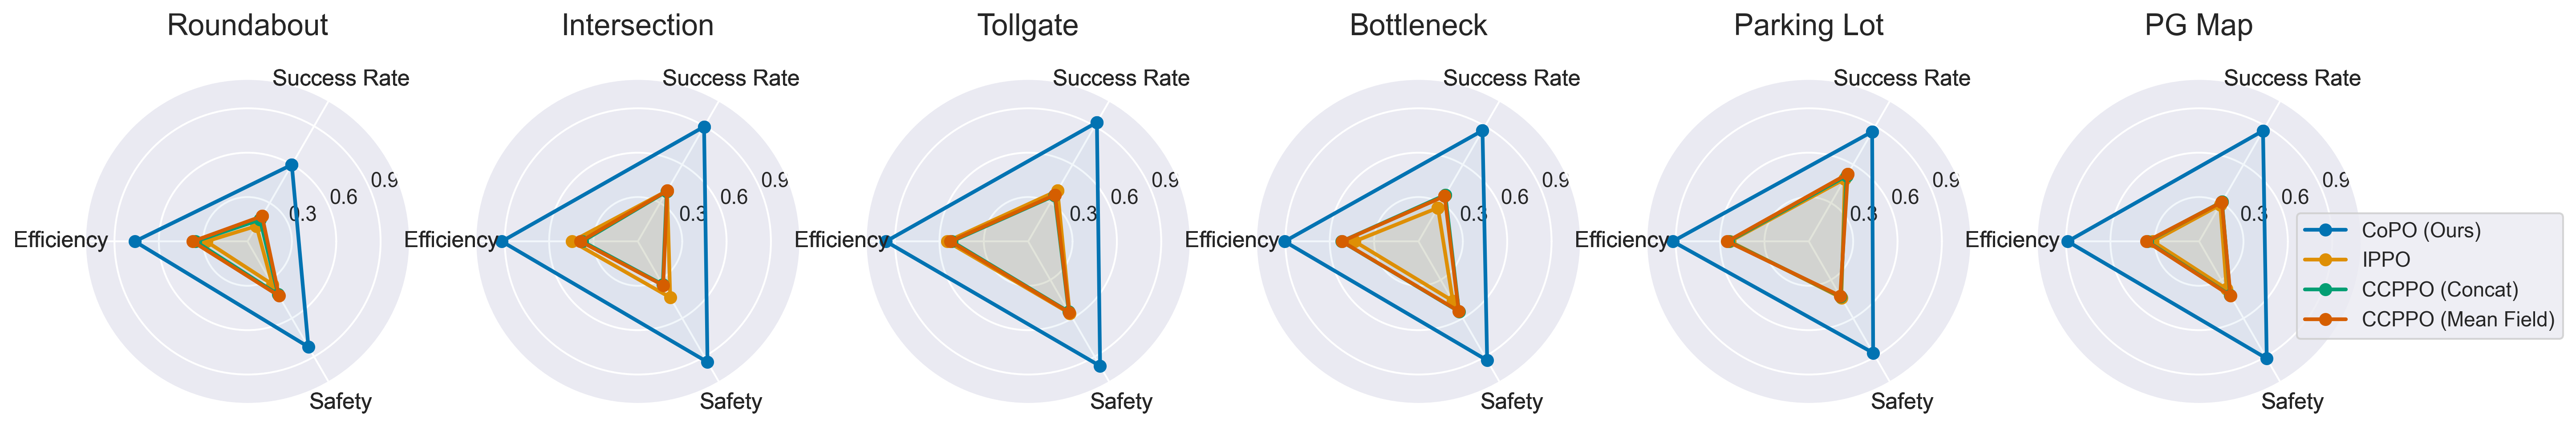

In [6]:
sns.set("notebook", "darkgrid")
c = sns.color_palette("colorblind")


# Rename and reorder environments and algorithms
env_mapping = {
    "Round": "Roundabout",
    "Inter": "Intersection",
    "Tollgate": "Tollgate",
    "Bottle": "Bottleneck",
    "Parking": "Parking Lot",
    "PGMap": "PG Map"
}

algo_mapping = {
    "1003_copo": "CoPO (Ours)",
    "1003_ippo": "IPPO",
    "1011_ccppo_concat": "CCPPO (Concat)",
    "1012_ccppo_mf": "CCPPO (Mean Field)",
#     "1003_cl": "CL",
}

# matplotlib.rcParams['font.family'] = 'sans-serif'
fig = plt.figure(dpi=300, figsize=(22, 6))  

for env_count, env in enumerate(env_mapping.keys()):
    env_plot_data = final_plot_data_to_plot[final_plot_data_to_plot.env == env] 

    ax = fig.add_subplot(1, 6, env_count + 1, polar=True)
    
    for algo_count, algo in enumerate(algo_mapping.keys()):
        algo_plot_data = env_plot_data[env_plot_data.algo == algo]
    
        draw_labels = ["Competence", "Efficiency", "Safety"]
        plot_labels = ["Success Rate", "Efficiency", "Safety"]
        
        stats = [algo_plot_data[algo_plot_data.print_key == k].value.mean() for k in draw_labels]
        
        angles = np.linspace(0, 2*np.pi, len(draw_labels), endpoint=False)+ np.pi/2 - np.pi / 6
        stats = np.concatenate((stats, [stats[0]]))
        angles = np.concatenate((angles, [angles[0]]))

        ax.plot(angles, stats, 'o-', linewidth=2, label=algo_mapping[algo], c=c[algo_count])
        ax.fill(angles, stats, alpha=0.05, c=c[algo_count])
        ax.set_ylim(0, 1.1)
        
        # print("Env {}, Algo {}, {}, {}".format(env, algo, angles, plot_labels))
        ax.set_thetagrids(angles[:3] * 180/np.pi, plot_labels)
        
        ax.tick_params(pad=0)

        plt.gcf().canvas.draw()
        labels = []
        angles2 = [0, 0, 0]
        for label, angle in zip(ax.get_xticklabels(), angles2):
            x,y = label.get_position()
            lab = ax.text(x,y, label.get_text(), transform=label.get_transform(),
                          ha=label.get_ha(), va=label.get_va(),
                          fontname=label.get_fontname(),
                          fontstyle="normal",
                          fontweight="light"
                         )
            lab.set_rotation(angle)
        ax.set_xticklabels([])
        ax.set_yticks([0.3, 0.6, 0.9])
        ax.set_title(env_mapping[env], size=16, y=1.1)
        
ax.legend(loc=(0.8, 0.2))
fig.savefig("evaluate_result_1m.pdf".format(env), format='pdf', dpi=300, bbox_inches = "tight")
fig.savefig("evaluate_result_1m.png".format(env), format='png', dpi=300, bbox_inches = "tight")


In [9]:
for (env, algo, key), gb in final_plot_data_to_plot.groupby(["env", "algo", "print_key"]):
    print(env, algo, key, gb["value"].mean())

Bottle 1003_ccppo Competence 0.24500885652135784
Bottle 1003_ccppo Efficiency 0.428959151955513
Bottle 1003_ccppo Safety 0.4689018666033085
Bottle 1003_cl Competence 0.2806168233590949
Bottle 1003_cl Efficiency 0.3822613021247415
Bottle 1003_cl Safety 0.335197923421094
Bottle 1003_copo Competence 0.8658171247631371
Bottle 1003_copo Efficiency 0.9058108355259397
Bottle 1003_copo Safety 0.9287588691526636
Bottle 1003_ippo Competence 0.2626283418733707
Bottle 1003_ippo Efficiency 0.4321189066510724
Bottle 1003_ippo Safety 0.46482486479490226
Bottle 1011_ccppo_concat Competence 0.362684946983401
Bottle 1011_ccppo_concat Efficiency 0.5194820866833046
Bottle 1011_ccppo_concat Safety 0.5473357313409458
Bottle 1012_ccppo_mf Competence 0.35391300111836943
Bottle 1012_ccppo_mf Efficiency 0.5182400979128047
Bottle 1012_ccppo_mf Safety 0.5445957886737458
Inter 1003_ccppo Competence 0.31204516664385334
Inter 1003_ccppo Efficiency 0.30271455755338145
Inter 1003_ccppo Safety 0.27570099052193653
Inter